## Create a model to predict whether a house is expensive or not. 

### Dataset variables:

* LotFrontage: Linear feet of street connected to property

* LotArea: Lot size in square feet

* TotalBsmtSF: Total square feet of basement area

* BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

* Fireplaces: Number of fireplaces

* PoolArea: Pool area in square feet

* GarageCars: Size of garage in car capacity

* WoodDeckSF: Wood deck area in square feet

* ScreenPorch: Screen porch area in square feet


## 1. Data reading

In [4]:
import pandas as pd

In [9]:
# import data
data= pd.read_csv('data/housing-classification-iter-0-2.csv')
data.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive'],
      dtype='object')

The target column (what we want our model to predict) is usually denoted as `y`. We will "pop" it out from the rest of the data:

In [10]:
#As you can see, the target is just a bunch of zeros and ones.
y = data.pop("Expensive")

In [ ]:
print(y.tolist())

In [ ]:
#X = data.drop(columns=["", ""])
#X.head()

### 2. Basic Exploration

Just look briefly at the data types of your columns get get an idea of how they look like.

In [14]:
X=data

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 102.8 KB


In [16]:
X.isna().sum()

LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
dtype: int64

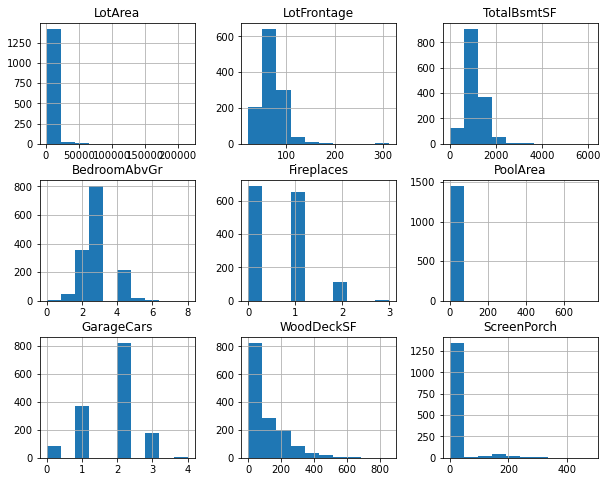

In [17]:
X.hist(figsize=(10, 8));

## 3. Train-test split

Before performing a deeper exploration, we will split the dataset into 2 chunks: train and test. We will use the train set to find patterns in the data and create a model. The test set will remain untouched, unseen, unexplored. It will be the "reality check" for our model, it will let us know whether our model is able to generalize. 

Here, we're using the function `train_test_split` to shuffle the observations randomly and create the train and test sets for both the `X` and the `y` objects at the same time, ensuring that they are shuffled the same way:

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)

In [19]:
X_train.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
772,7819,94.0,1029,3,1,0,2,144,0
157,12003,92.0,774,4,1,0,3,0,0
360,7540,NaN,888,2,1,0,2,0,192
744,5395,41.0,1337,2,1,0,2,96,0
150,10356,120.0,969,3,0,0,2,0,0


In [20]:
y_train.head()

772    0
157    1
360    0
744    0
150    0
Name: Expensive, dtype: int64

In [21]:
X_test.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
1253,17542,NaN,1192,3,2,0,2,220,0
202,7000,50.0,617,2,0,0,1,0,0
213,13568,43.0,990,3,0,0,2,224,0
1331,10780,55.0,911,3,0,0,2,0,0
120,21453,NaN,938,1,2,0,2,0,0


In [22]:
y_test

1253    1
202     0
213     0
1331    0
120     0
       ..
978     0
1057    0
782     0
125     0
1409    0
Name: Expensive, Length: 292, dtype: int64

## 4. Iteration 0 - An intuition-based model

Machine Learning models should never be the first option to solve any problem. Machine Learning adds complexity to a business, and it should only be implemented if it represents a clear advantage compared to a simple working solution that the company has build following simple rules, common sense or gained expertise. 

Therefore, the first step when solving any problem should be to create a simple (even dumb) working solution and learn to evaluate it. In our example: how well can we predict expensive house with an extremely simple rule?

Let's start by suggesting that evry house is expensive. We will call this "model" the "pessimistic" one, and use it to make predictions for both the train and the test set:

In [23]:
y_train.value_counts()

0    989
1    179
Name: Expensive, dtype: int64

In [24]:
len(y_train)

1168

Our predictions for the train set will be just 1168 zeros:

In [27]:
pred_pessimistic_train=pd.Series(0, index=range(1168))

Now: how good are those predictions? We will compare them with the true values and find out the percentage of correctly predicted passengers. This metric is called **accuracy**:

In [28]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_true = y_train,
                                 y_pred = pred_pessimistic_train
                                 )

round(train_accuracy, 2)

0.85

Okay, we have about a 85% accuracy in our train set. Let's find out how would have it done in our test set:

In [30]:
len(y_test)

292

In [31]:
pred_pessimistic_test = pd.Series(0, index=range(292))

In [32]:
test_accuracy = accuracy_score(y_true = y_test,
                               y_pred = pred_pessimistic_test
                               )

round(test_accuracy, 2)

0.87